<a href="https://www.kaggle.com/code/mesutssmn/flo-unsupervised-learning?scriptVersionId=188877957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #f601; font-size: 150%; text-align: left;">

<h3 align="center"><font color='#30000' size=120%>FLO CUSTOMER SEGMENTATION UNSUPERVISED LEARNING</font></h3>

    
<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for unsupervised learning, Some CRM methods</li>
    
<li> Some analysis and statistics</li>
    
<li> Kmeans, Hierarchical Clustering
    
    

<h3 align="left"><font color='#300000' size=5%>ABOUT COMPANY:</font></h3>

Founded in 1960, FLO is one of the leading companies in the Turkish footwear market. With the vision of leading the footwear sector in Turkey and elevating it to the top ranks in global production, FLO directly employs over 15,000 people and indirectly provides employment to nearly 30,000 people. Today, FLO operates more than 850 stores domestically and internationally across 30 countries, including the CIS, the Middle East, and North Africa.
   
    
<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*GzZ1cWY9F7-QXUkOxZDKlg.png" alt="flo" width="900"></div>
    
<div style="border-radius: 10px; overflow: hidden; text-align: right;">
    <img src="https://www.kdnuggets.com/wp-content/uploads/c_unveiling_hidden_patterns_introduction_hierarchical_clustering_9.png" alt="flo" width="900"></div>
</div>

   ##### Thank you for taking the time to read. Please don't ignore voting.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTS </div>


In [1]:
%%capture
!pip install pydotplus missingno astor skompiler yellowbrick joblib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler
import scipy.stats as stats
import missingno as msno
import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_ = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv") 

In [5]:
df = df_.copy()

In [6]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURES </div>


<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #f601; font-size: 150%; text-align: left;">
<h3 align="left"><font color='#300000' size=5%>Dataset Story:</font></h3>
<p>The dataset consists of information derived from the past shopping behaviors of customers who have shopped both online and offline between 2020 and 2021.</p>

<h4 align="left"><font color='#300000' size=5%>Data Description:</font></h4>
<ul style="background-color: #1; padding: 15px; border-radius: 5px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
<li><strong>master_id</strong>: Unique customer ID</li>
<li><strong>order_channel</strong>: The channel used for shopping (Android, iOS, Desktop, Mobile, Offline)</li>
<li><strong>last_order_channel</strong>: The channel used for the last purchase</li>
<li><strong>first_order_date</strong>: The date of the customer's first purchase</li>
<li><strong>last_order_date</strong>: The date of the customer's last purchase</li>
<li><strong>last_order_date_online</strong>: The date of the customer's last online purchase</li>
<li><strong>last_order_date_offline</strong>: The date of the customer's last offline purchase</li>
<li><strong>order_num_total_ever_online</strong>: Total number of purchases made online by the customer</li>
<li><strong>order_num_total_ever_offline</strong>: Total number of purchases made offline by the customer</li>
<li><strong>customer_value_total_ever_offline</strong>: Total amount spent by the customer on offline purchases</li>
<li><strong>customer_value_total_ever_online</strong>: Total amount spent by the customer on online purchases</li>
<li><strong>interested_in_categories_12</strong>: List of categories in which the customer has shopped in the last 12 months</li>
</ul>
</div>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION </div>


In [7]:
def check_df(dataframe, head = 10):
    print('########## Shape of the dataframe ##########')
    print('\n')
    print(dataframe.shape)
    print('\n')
    print('########## Types ##########')
    print('\n')
    print(dataframe.dtypes)
    print('\n')
    print('########## Head ##########')
    print('\n')
    print(dataframe.head(head))
    print('\n')
    print('########## Tail ##########')
    print('\n')
    print(dataframe.tail(head))
    print('\n')
    print('########## NaN Values ##########')
    print('\n')
    for i in dataframe.columns:
        print(f'for {i} variable, the number of null values are {dataframe[i].isnull().sum()}')
        print('\n')
    print('########## Quantiles ##########')
    print('\n')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [8]:
check_df(df)

########## Shape of the dataframe ##########


(19945, 12)


########## Types ##########


master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object


########## Head ##########


                              master_id order_channel last_order_channel first_order_date  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08   
2  69b69676-1a40-11ea-941b-000d3a38a36f   And

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> EXPLORATORY DATA ANALYSIS </div>


In [9]:
date_columns = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Grab column names based on their types and cardinality.

    Parameters:
    cat_th (int): Threshold for numerical columns to be considered categorical. Default is 10.
    car_th (int): Threshold for categorical columns to be considered cardinal. Default is 20.

    Returns:
    tuple: Lists of categorical columns, numerical columns, and cardinal columns.
    """
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['category', 'object', 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ['int', 'float']]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ['category', 'object']]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['int', 'float', 'int64', 'float64']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'datetime64[ns]']
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'date_cols: {len(date_cols)}')

    return cat_cols, num_cols, cat_but_car, date_cols

In [12]:
cat_cols, num_cols, cat_but_car, date_cols = grab_col_names(df)

Observations: 19945
Variables: 12
cat_cols: 2
num_cols: 4
cat_but_car: 2
num_but_cat: 0
date_cols: 4


In [13]:
cat_cols, num_cols, cat_but_car, date_cols 

(['order_channel', 'last_order_channel'],
 ['order_num_total_ever_online',
  'order_num_total_ever_offline',
  'customer_value_total_ever_offline',
  'customer_value_total_ever_online'],
 ['master_id', 'interested_in_categories_12'],
 ['first_order_date',
  'last_order_date',
  'last_order_date_online',
  'last_order_date_offline'])

In [14]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> VISUALIZATION </div>


In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("######################### *** #########################")

    if plot:
        fig, axs = plt.subplots(1, 4, figsize=(18, 10))
        counts = dataframe[col_name].value_counts()
        ratios = 100 * counts / len(dataframe)
        
        # Count Plot
        plt.subplot(1, 4, 1)
        ax = sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)
        
        for i, p in enumerate(ax.patches):
            height = p.get_height()
            ratio_value = ratios[i] if i in ratios.index else 0  # Varsayılan değer olarak 0 kullanılıyor
            ax.text(p.get_x() + p.get_width()/2., height + 0.01*max(counts),
                    f'{ratio_value:.2f}%',
                    ha="center", va="bottom")

        # Pie Chart
        plt.subplot(1, 4, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)

        # Box Plot (MonthlyCharges)
        plt.subplot(1, 4, 3)
        sns.boxplot(data=dataframe, x=col_name, y="customer_value_total_ever_offline", hue="last_order_channel")
        plt.title("Total Ever Offline vs " + col_name) 
        plt.xticks(rotation=90)

        # Box Plot (TotalCharges)
        plt.subplot(1, 4, 4)
        sns.boxplot(data=dataframe, x=col_name, y="customer_value_total_ever_online", hue="last_order_channel")
        plt.title("Total Ever Online vs " + col_name)
        plt.xticks(rotation=90)

        plt.tight_layout()
        plt.show()

               order_channel  Ratio
order_channel                      
Android App             9495 47.606
Mobile                  4882 24.477
Ios App                 2833 14.204
Desktop                 2735 13.713
######################### *** #########################


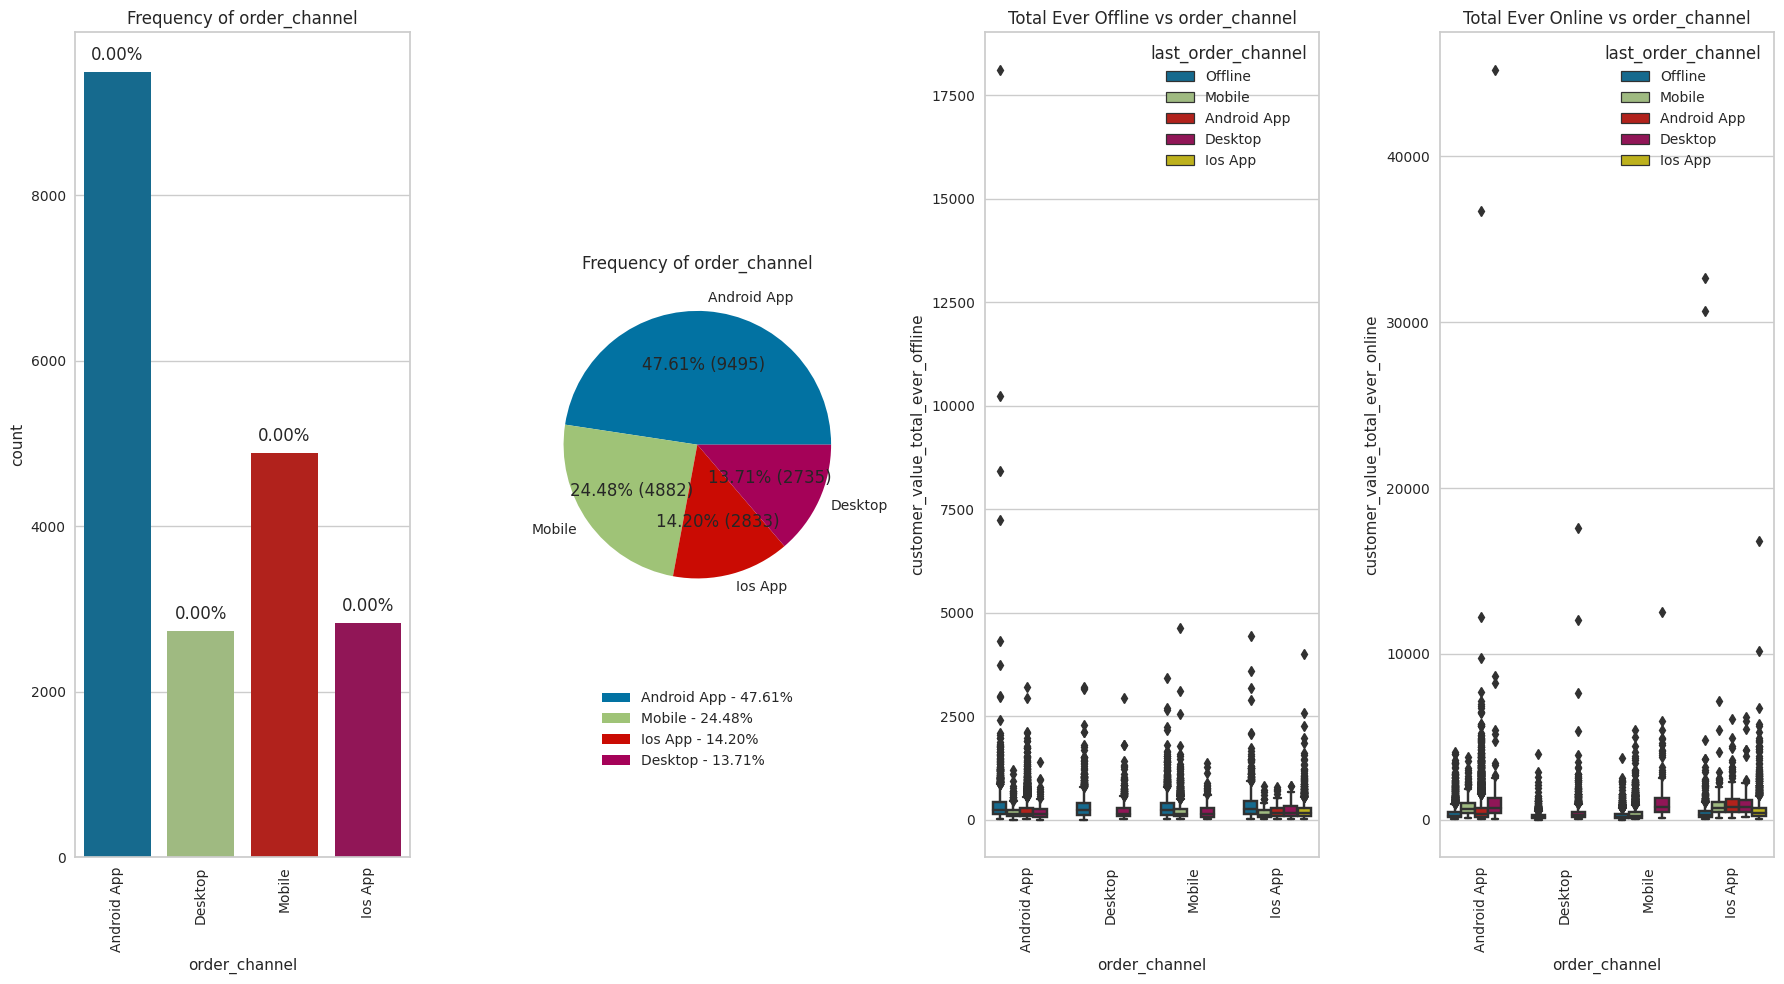

                    last_order_channel  Ratio
last_order_channel                           
Android App                       6783 34.009
Offline                           6608 33.131
Mobile                            3172 15.904
Ios App                           1696  8.503
Desktop                           1686  8.453
######################### *** #########################


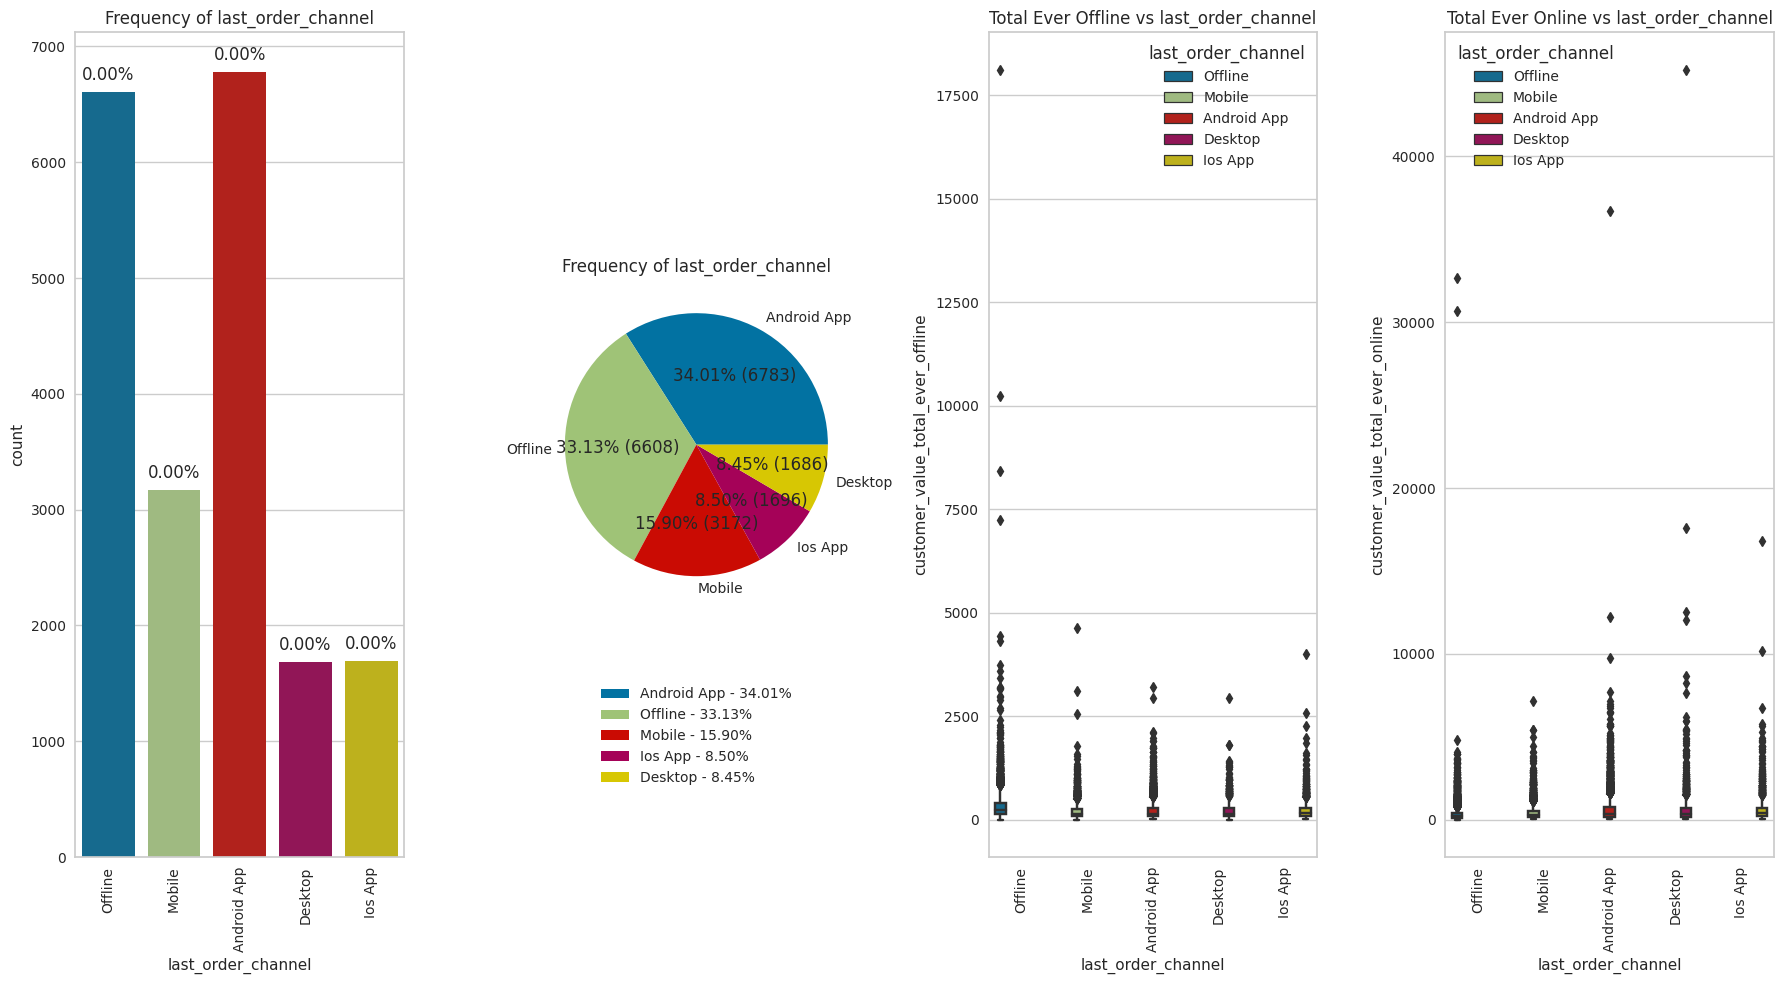

In [16]:
for col in cat_cols:
    cat_summary(df, col , plot = True)

In [17]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], shade=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Density')
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + ' QQ Plot')
        
        plt.tight_layout()
        plt.show(block=True)
        
    print("#####################################")

count   19945.000
mean        3.111
std         4.226
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         2.000
60%         2.000
70%         3.000
80%         4.000
90%         7.000
95%        10.000
99%        20.000
max       200.000
Name: order_num_total_ever_online, dtype: float64


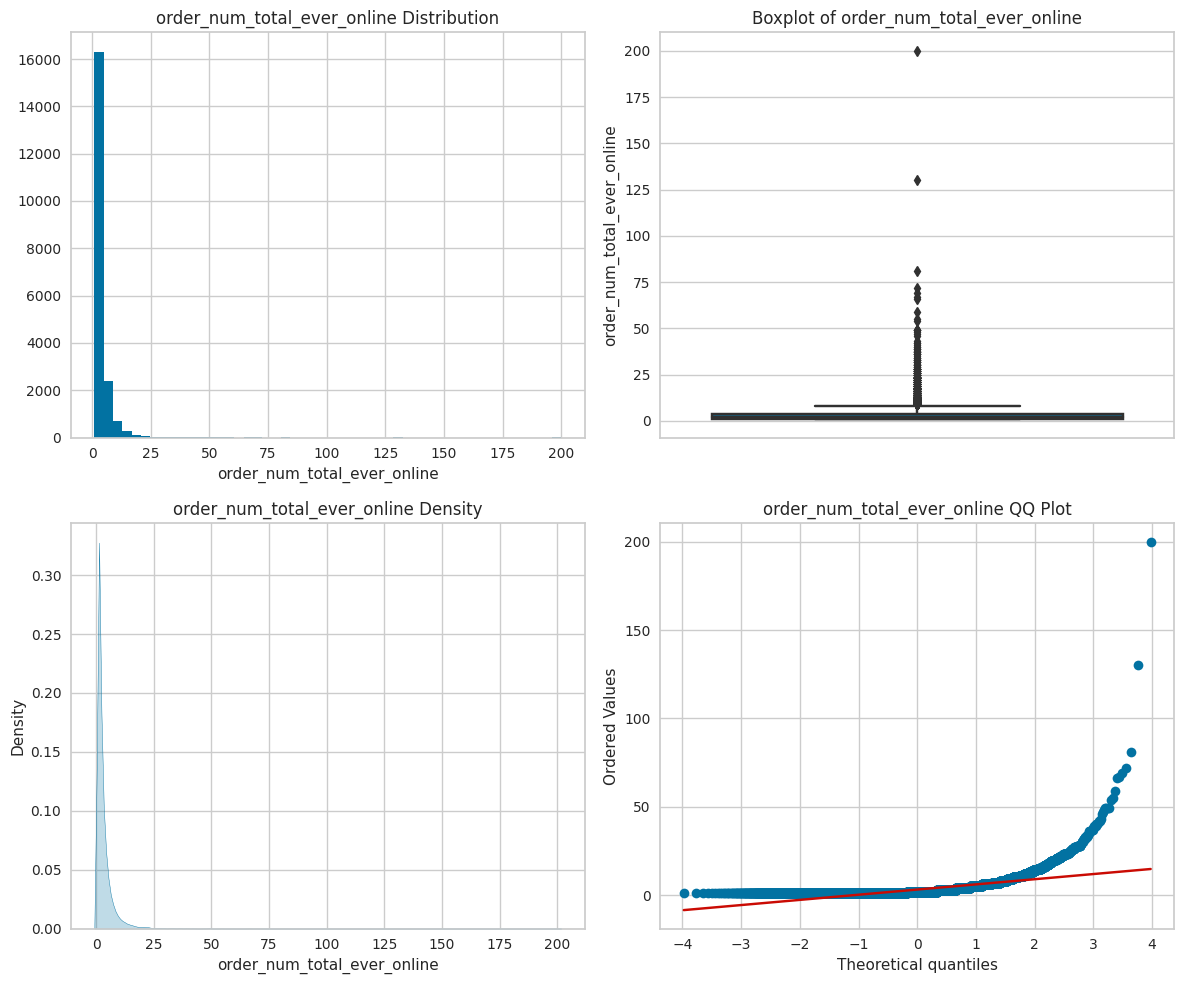

#####################################
count   19945.000
mean        1.914
std         2.063
min         1.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         1.000
60%         2.000
70%         2.000
80%         3.000
90%         4.000
95%         4.000
99%         7.000
max       109.000
Name: order_num_total_ever_offline, dtype: float64


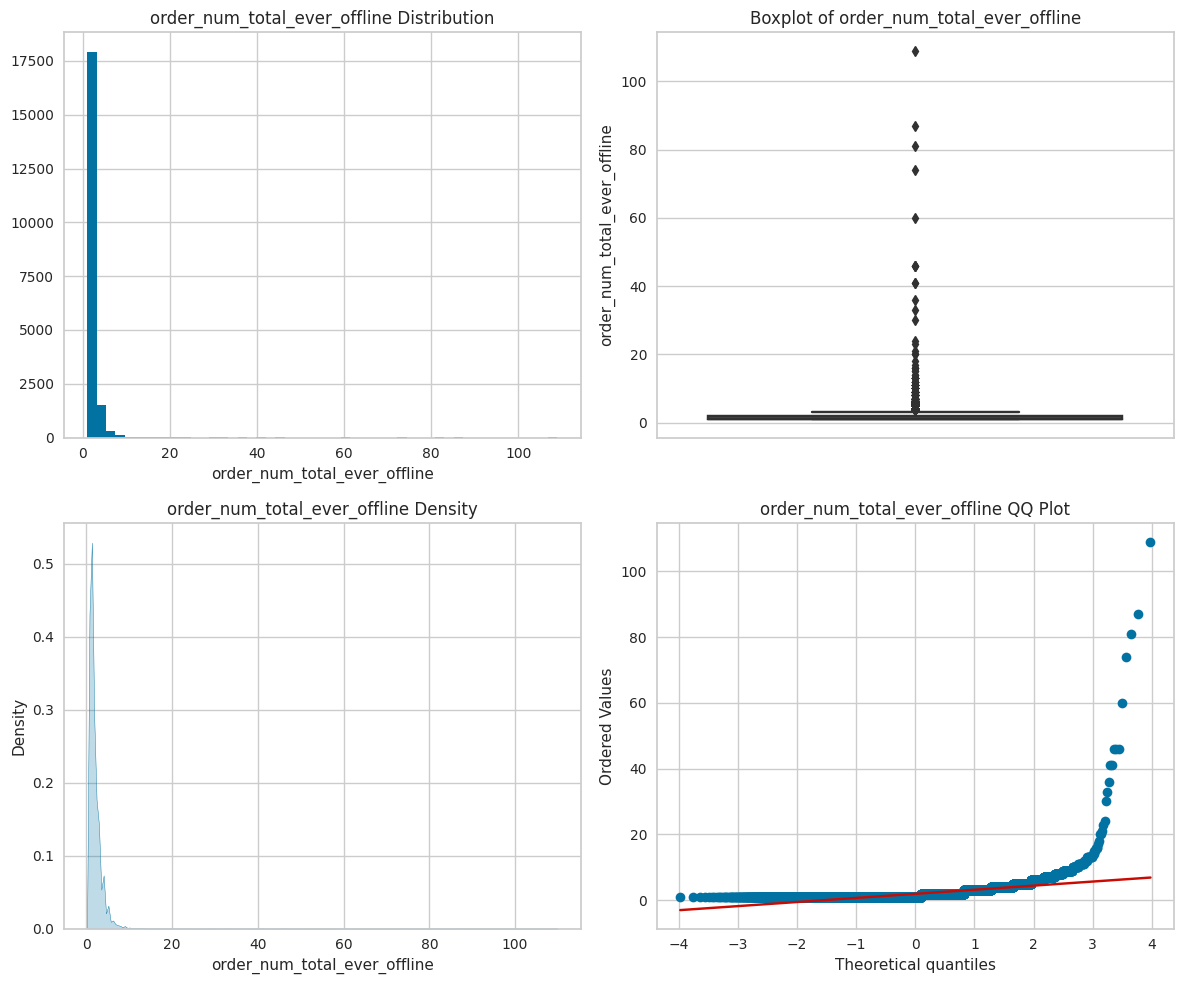

#####################################
count   19945.000
mean      253.923
std       301.533
min        10.000
5%         39.990
10%        59.990
20%        89.980
30%       110.480
40%       140.230
50%       179.980
60%       220.860
70%       281.868
80%       365.058
90%       519.950
95%       694.222
99%      1219.947
max     18119.140
Name: customer_value_total_ever_offline, dtype: float64


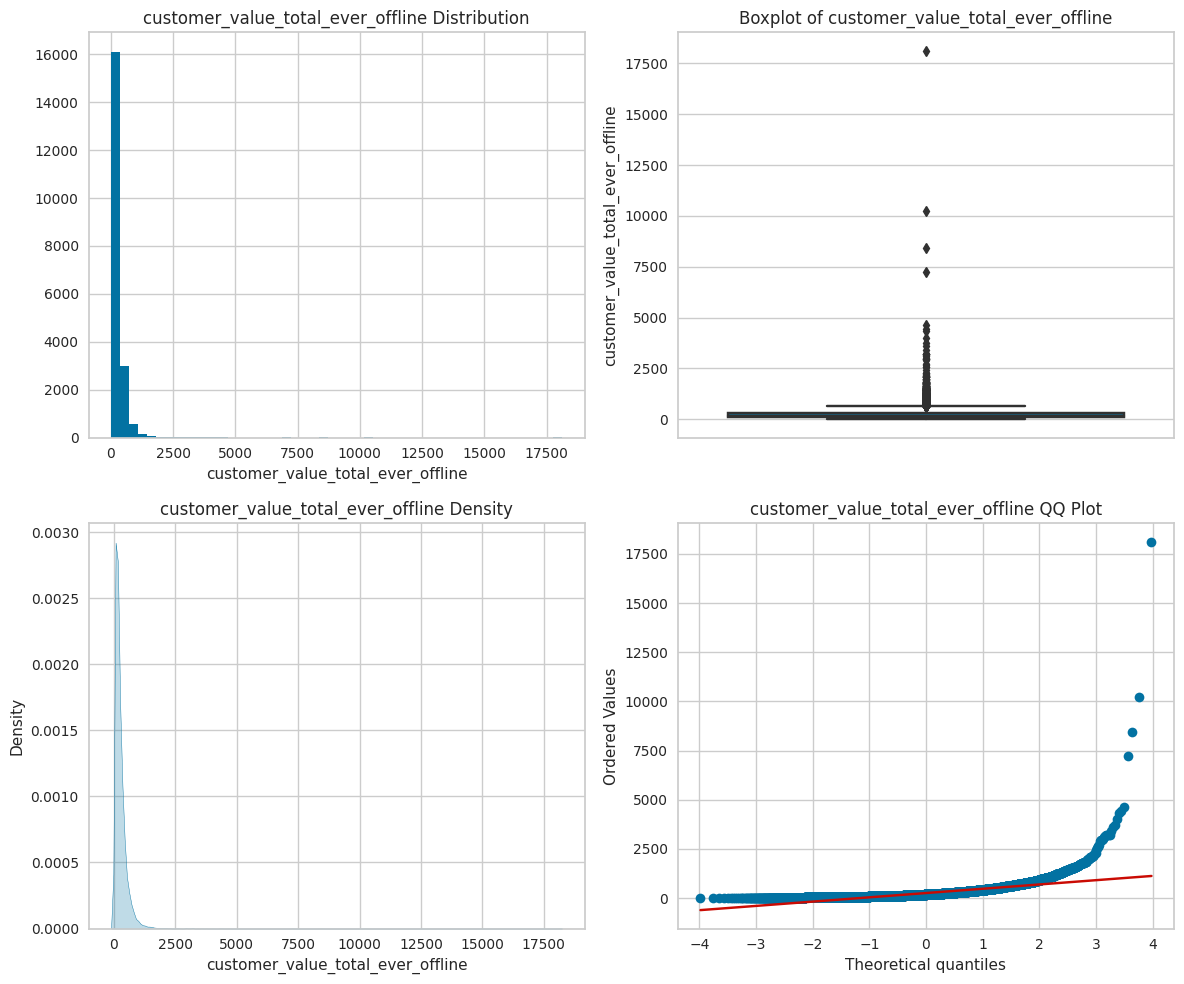

#####################################
count   19945.000
mean      497.322
std       832.602
min        12.990
5%         63.990
10%        84.990
20%       125.990
30%       173.970
40%       219.990
50%       286.460
60%       371.944
70%       491.526
80%       690.868
90%      1082.036
95%      1556.726
99%      3143.810
max     45220.130
Name: customer_value_total_ever_online, dtype: float64


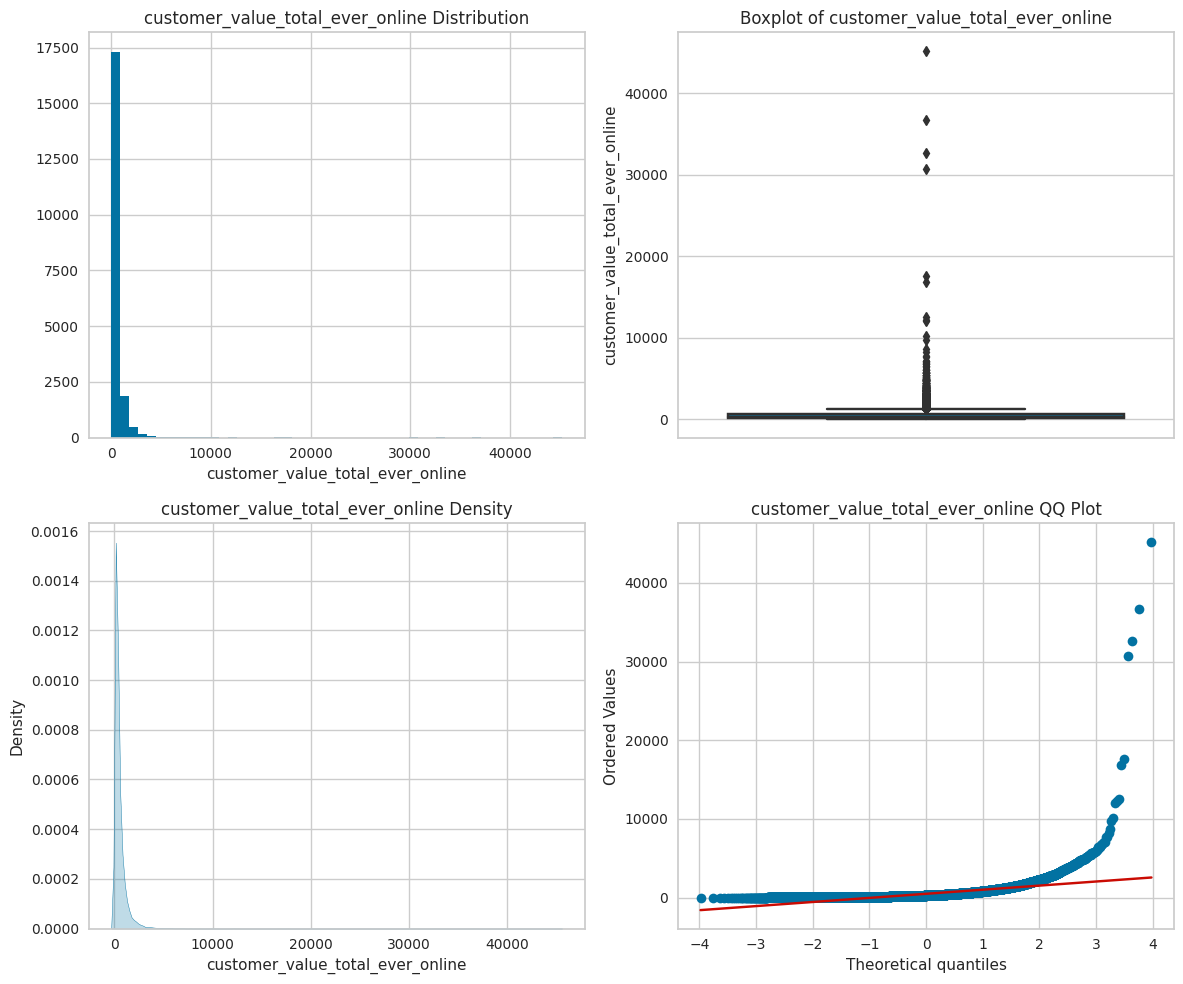

#####################################


In [18]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [19]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [20]:
def outlier_thresholds(dataframe, col_name, q1=0.2, q3=0.8):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.2, q3=0.8):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

order_num_total_ever_online True
order_num_total_ever_offline True
customer_value_total_ever_offline True
customer_value_total_ever_online True


In [22]:
for col in num_cols:
    replace_with_thresholds(df,col)

In [23]:
for col in num_cols:
    print(col, check_outlier(df, col))

order_num_total_ever_online False
order_num_total_ever_offline False
customer_value_total_ever_offline False
customer_value_total_ever_online False


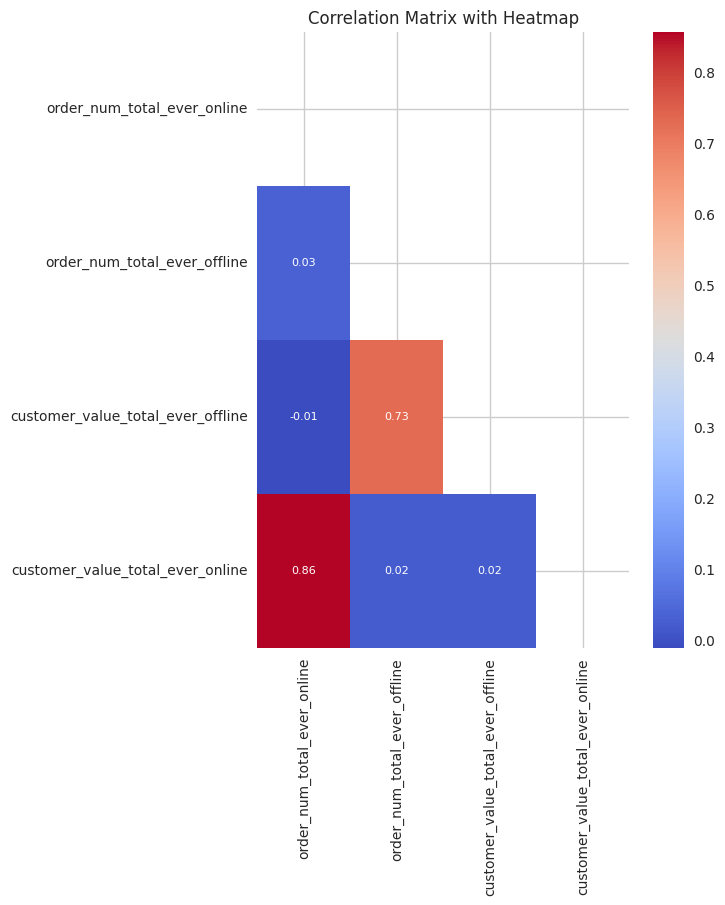

In [24]:
corr_matrix = df[num_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix with Heatmap')
plt.show()

In [25]:
df['Total_Order'] = df['order_num_total_ever_offline'] + df['order_num_total_ever_online']
df['Total_Value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [26]:
analysis_date = df['last_order_date'].max() + dt.timedelta(days=2)
df["recency"] = (analysis_date - df["last_order_date"]).dt.days
df["tenure"] = (analysis_date - df["first_order_date"]).dt.days

In [27]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Order,Total_Value,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370,95,214
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,8.500,2.000,159.970,1538.185,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",10.500,1698.155,105,1574
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320,186,552
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970,135,146
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980,86,668


In [28]:
cat_cols, num_cols, cat_but_car, date_cols = grab_col_names(df)

Observations: 19945
Variables: 16
cat_cols: 4
num_cols: 6
cat_but_car: 2
num_but_cat: 2
date_cols: 4


In [29]:
for col in num_cols:
    print(df[col].skew())

1.3236999804155816
1.4493558784108909
1.169950106498492
1.1955820827771075
0.6172952414573327
1.7781720103951533


In [30]:
for col in num_cols:
    df[col] = np.log1p(df[col])

In [31]:
for col in num_cols:
    print(df[col].skew())

-0.24205748449399025
-0.02818616520563405
0.4615431718599007
-0.13648450367958598
-0.841803439673339
-0.7852333498059365


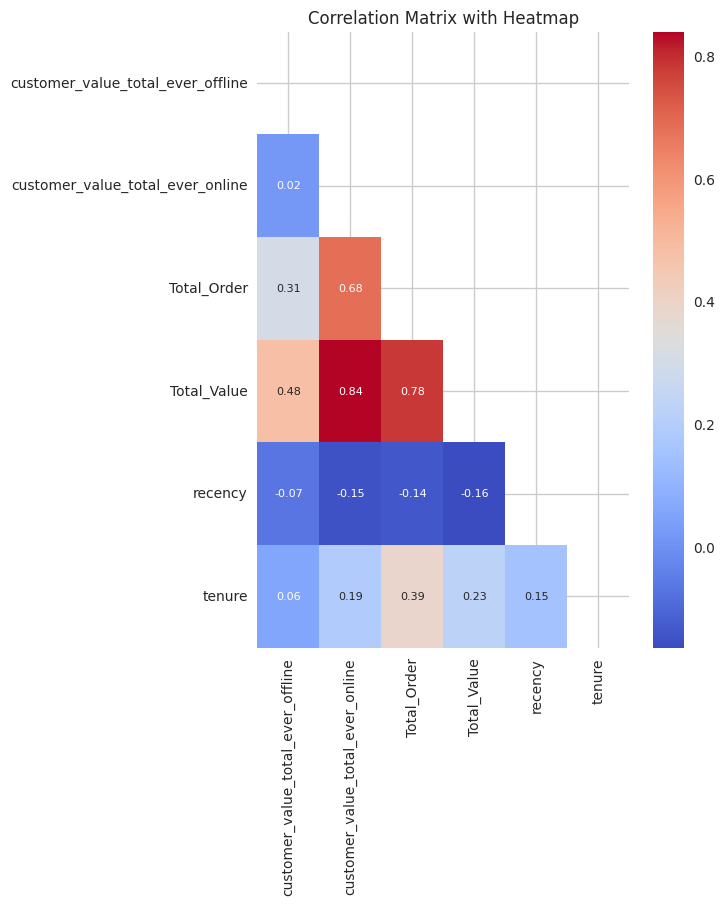

In [32]:
corr_matrix = df[num_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix with Heatmap')
plt.show()

In [33]:
rb = RobustScaler()
df[num_cols] = rb.fit_transform(df[num_cols])

In [34]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Order,Total_Value,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,-0.216,0.761,[KADIN],0.326,0.566,-0.101,-2.312
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,8.500,2.000,-0.101,1.248,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",1.488,1.183,-0.036,1.838
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,0.046,0.239,"[ERKEK, KADIN]",0.326,0.074,0.335,-0.343
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,-1.284,-0.924,"[AKTIFCOCUK, COCUK]",-0.913,-1.555,0.127,-3.104
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,-1.096,-0.431,[AKTIFSPOR],-0.913,-0.992,-0.165,0.054


In [35]:
df_cluster = df[['order_num_total_ever_online', 'order_num_total_ever_offline',
 'customer_value_total_ever_offline', 'customer_value_total_ever_online',
 'Total_Order', 'Total_Value', 'recency', 'tenure']]
df_cluster.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,Total_Order,Total_Value,recency,tenure
0,4.000,1.000,-0.216,0.761,0.326,0.566,-0.101,-2.312
1,8.500,2.000,-0.101,1.248,1.488,1.183,-0.036,1.838
2,3.000,2.000,0.046,0.239,0.326,0.074,0.335,-0.343
3,1.000,1.000,-1.284,-0.924,-0.913,-1.555,0.127,-3.104
4,1.000,1.000,-1.096,-0.431,-0.913,-0.992,-0.165,0.054


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> UNSUPERVISED ML </div>


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> Kmeans </div>


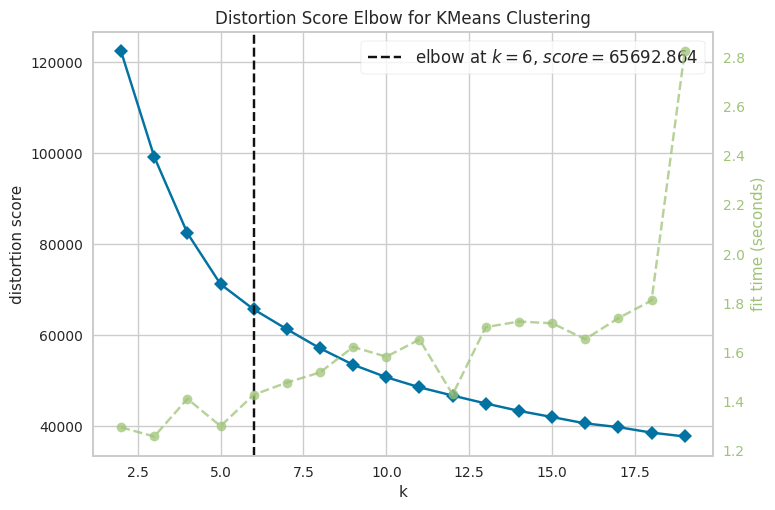

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
K = KMeans()
elbow = KElbowVisualizer(K, k=(2,20))
elbow.fit(df_cluster)
elbow.show()

In [37]:
elbow.elbow_value_

6

In [38]:
kmeans = KMeans(n_clusters=elbow.elbow_value_, n_init=50).fit(df_cluster)
labels = kmeans.labels_
labels

array([1, 3, 1, ..., 5, 4, 5], dtype=int32)

In [39]:
kmeans.cluster_centers_

array([[ 1.3671337 ,  2.24697222,  0.40551138, -0.31172707, -0.16439425,
        -0.0579345 , -0.10817823,  0.23696573],
       [ 3.82607626,  1.51734317, -0.15921132,  0.4811133 ,  0.39766679,
         0.31878689, -0.19525502,  0.29015967],
       [ 1.42246726,  1.21157822, -0.08761765, -0.27212533, -0.61421317,
        -0.32152222, -0.55570751, -2.97984385],
       [ 7.66803922,  1.93372549, -0.05840364,  1.02091214,  1.32301554,
         0.95540845, -0.33433436,  1.08988896],
       [ 2.06643357,  4.69405594,  0.94916608, -0.12047078,  0.7541446 ,
         0.45306364, -0.23019223,  0.44054944],
       [ 1.30695565,  1.06636425, -0.49575345, -0.39874749, -0.72220541,
        -0.6413718 ,  0.02403035, -0.1010035 ]])

In [40]:
df_cluster["clusters"] = labels+1

In [41]:
df_cluster.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,Total_Order,Total_Value,recency,tenure,clusters
0,4.000,1.000,-0.216,0.761,0.326,0.566,-0.101,-2.312,2
1,8.500,2.000,-0.101,1.248,1.488,1.183,-0.036,1.838,4
2,3.000,2.000,0.046,0.239,0.326,0.074,0.335,-0.343,2
3,1.000,1.000,-1.284,-0.924,-0.913,-1.555,0.127,-3.104,3
4,1.000,1.000,-1.096,-0.431,-0.913,-0.992,-0.165,0.054,6


In [42]:
df_cluster.groupby("clusters").agg({"mean","median", "min", "max","count"})

order_num_total_ever_online                          order_num_total_ever_offline        \
                                 max  mean count median   min                          max  mean   
clusters                                                                                           
1                              3.000 1.368  4214  1.000 1.000                        4.000 2.246   
2                              6.000 3.826  4064  4.000 2.000                        4.000 1.517   
3                              6.000 1.425  1451  1.000 1.000                        5.000 1.212   
4                              8.500 7.668  2550  8.000 5.000                        6.000 1.934   
5                              6.000 2.066  1716  2.000 1.000                        6.000 4.694   
6                              3.000 1.307  5950  1.000 1.000                        2.000 1.066   

                            customer_value_total_ever_offline                             \
         count median   min                               max   mean count median    min   
clusters                                                                                   
1         4214  2.000 1.000                             1.262  0.405  4214  0.394 -1.096   
2         4064  1.000 1.000                             1.262 -0.159  4064 -0.155 -2.422   
3         1451  1.000 1.000                             1.262 -0.088  1451 -0.097 -2.279   
4         2550  1.000 1.000                             1.262 -0.058  2550 -0.049 -2.214   
5         1716  4.000 3.000                             1.262  0.949  1716  1.023 -0.446   
6         5950  1.000 1.000                             1.183 -0.496  5950 -0.497 -2.384   

         customer_value_total_ever_online                            Total_Order               \
                                      max   mean count median    min         max   mean count   
clusters                                                                                        
1                                   1.248 -0.312  4214 -0.304 -2.148       0.601 -0.165  4214   
2                                   1.248  0.481  4064  0.488 -1.286       1.239  0.398  4064   
3                                   1.248 -0.271  1451 -0.262 -1.719       1.050 -0.613  1451   
4                                   1.248  1.021  2550  1.107 -0.076       2.022  1.323  2550   
5                                   1.248 -0.120  1716 -0.101 -2.148       1.707  0.754  1716   
6                                   1.248 -0.399  5950 -0.365 -2.248       0.326 -0.722  5950   

                       Total_Value                            recency                             \
         median    min         max   mean count median    min     max   mean count median    min   
clusters                                                                                           
1         0.000 -0.913       1.457 -0.058  4214 -0.073 -1.539   0.778 -0.108  4214  0.040 -2.367   
2         0.326 -0.399       1.506  0.319  4064  0.326 -1.176   0.778 -0.195  4064 -0.030 -2.367   
3        -0.913 -0.913       1.506 -0.321  1451 -0.335 -2.473   0.672 -0.555  1451 -0.442 -2.367   
4         1.326  0.840       1.506  0.955  2550  1.070 -0.456   0.778 -0.334  2550 -0.196 -2.367   
5         0.840  0.326       1.506  0.453  1716  0.493 -0.752   0.776 -0.230  1716 -0.108 -2.367   
6        -0.913 -0.913       1.093 -0.641  5950 -0.639 -2.580   0.778  0.024  5950  0.208 -2.367   

         tenure                             
            max   mean count median    min  
clusters                                    
1         3.193  0.238  4214  0.057 -2.057  
2         3.219  0.291  4064  0.100 -3.634  
3        -1.114 -2.981  1451 -2.636 -9.770  
4         3.223  1.090  2550  1.133 -5.310  
5         3.201  0.441  1716  0.376 -4.479  
6         3.207 -0.102  5950 -0.184 -1.973

In [43]:
df_cluster["clusters"].value_counts()

clusters
6    5950
1    4214
2    4064
4    2550
5    1716
3    1451
Name: count, dtype: int64

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> CUSTOMER SEGMENTATION WITH HIERARCHICAL CLUSTERING </div>


In [44]:
lnk = linkage(df_cluster, "average")

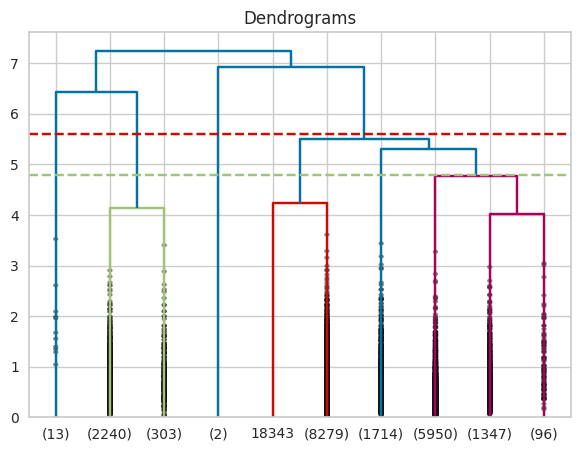

In [45]:
plt.figure(figsize = (7,5))
plt.title("Dendrograms")
dend = dendrogram(lnk,
                 truncate_mode = "lastp",
                 p=10,
                 show_contracted = True,
                 leaf_font_size = 10)

plt.axhline(y = 5.6, color = "r",linestyle = "--" )
plt.axhline(y = 4.8, color = "g",linestyle = "--" )


plt.show()

In [46]:
agg = AgglomerativeClustering(n_clusters = 6, linkage = "average") 

In [47]:
cluster = agg.fit_predict(df_cluster)

In [48]:
np.unique(cluster)

array([0, 1, 2, 3, 4, 5])

In [49]:
df_cluster["hi_cluster_no"] = cluster + 1

In [50]:
df_cluster["hi_cluster_no"].value_counts() 

hi_cluster_no
2    8280
1    7393
5    2543
3    1714
4      13
6       2
Name: count, dtype: int64

In [51]:
df_cluster.groupby("hi_cluster_no").agg({"mean","median", "min", "max","count"})

order_num_total_ever_online                          order_num_total_ever_offline  \
                                      max  mean count median   min                          max   
hi_cluster_no                                                                                     
1                                   4.000 1.326  7393  1.000 1.000                        4.000   
2                                   6.000 2.575  8280  2.000 1.000                        4.000   
3                                   6.000 2.064  1714  2.000 1.000                        6.000   
4                                   8.500 6.769    13  7.000 5.000                        4.000   
5                                   8.500 7.667  2543  8.000 5.000                        6.000   
6                                   3.000 2.500     2  2.500 2.000                        6.000   

                                       customer_value_total_ever_offline                      \
               mean count median   min                               max   mean count median   
hi_cluster_no                                                                                  
1             1.094  7393  1.000 1.000                             1.262 -0.417  7393 -0.417   
2             1.888  8280  2.000 1.000                             1.262  0.128  8280  0.211   
3             4.693  1714  4.000 3.000                             1.262  0.949  1714  1.022   
4             1.385    13  1.000 1.000                             1.262  0.408    13  0.349   
5             1.937  2543  1.000 1.000                             1.262 -0.059  2543 -0.049   
6             5.500     2  5.500 5.000                             1.238  1.116     2  1.116   

                     customer_value_total_ever_online                            Total_Order  \
                 min                              max   mean count median    min         max   
hi_cluster_no                                                                                  
1             -2.384                            1.248 -0.375  7393 -0.344 -2.248       0.601   
2             -2.422                            1.248  0.078  8280  0.151 -2.148       1.239   
3             -0.446                            1.248 -0.121  1714 -0.101 -2.148       1.707   
4             -1.096                            1.248  1.000    13  1.248  0.273       1.775   
5             -2.214                            1.248  1.021  2543  1.106 -0.076       2.022   
6              0.994                            0.153 -0.039     2 -0.039 -0.230       1.050   

                                         Total_Value                            recency         \
                mean count median    min         max   mean count median    min     max   mean   
hi_cluster_no                                                                                    
1             -0.703  7393 -0.913 -0.913       1.506 -0.580  7393 -0.584 -2.580   0.778 -0.089   
2              0.112  8280  0.000 -0.913       1.506  0.127  8280  0.121 -1.539   0.778 -0.151   
3              0.753  1714  0.840  0.326       1.506  0.452  1714  0.493 -0.752   0.776 -0.229   
4              1.049    13  1.050  0.601       1.506  1.019    13  1.113  0.142  -0.196 -1.084   
5              1.323  2543  1.326  0.840       1.506  0.955  2543  1.069 -0.456   0.778 -0.332   
6              1.050     2  1.050  1.050       0.739  0.556     2  0.556  0.373  -0.657 -0.709   

                                  tenure                            clusters                     \
              count median    min    max   mean count median    min      max  mean count median   
hi_cluster_no                                                                                     
1              7393  0.097 -2.367  3.207 -0.662  7393 -0.355 -9.770        6 5.414  7393  6.000   
2              8280  0.006 -2.367  3.219  0.263  8280  0.072 -3.747        3 1.491  8280  1.000   
3             

<div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f601; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> Thanks for reading !!! </div>
